In [153]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [154]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [155]:
len(words)

32033

In [156]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [157]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [158]:
block_size = 3 #Block size is defined 3 as we are taking 3 characters to predict the third one accordingto the research paper
X, Y = [], []  #X is the input and Y are the labels
for w in words:
    #print(w)
    context = [0] * block_size
    
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [159]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [234]:
def build_dataset(words):
    
    block_size = 3 #Block size is defined 3 as we are taking 3 characters to predict the third one accordingto the research paper
    X, Y = [], []  #X is the input and Y are the labels
    for w in words:
    #print(w)
        context = [0] * block_size
    
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [160]:
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         ...,
         [26, 26, 25],
         [26, 25, 26],
         [25, 26, 24]]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [161]:
C = torch.randn(27, 2)

emb = C[X]

emb.shape

torch.Size([228146, 3, 2])

In [162]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100) 

torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape

In [163]:
torch.unbind(emb,1)

(tensor([[-1.1889, -0.1161],
         [-1.1889, -0.1161],
         [-1.1889, -0.1161],
         ...,
         [-1.2854,  0.6760],
         [-1.2854,  0.6760],
         [ 0.3714,  1.3718]]),
 tensor([[-1.1889, -0.1161],
         [-1.1889, -0.1161],
         [-0.0675, -0.0854],
         ...,
         [-1.2854,  0.6760],
         [ 0.3714,  1.3718],
         [-1.2854,  0.6760]]),
 tensor([[-1.1889, -0.1161],
         [-0.0675, -0.0854],
         [-1.0957, -0.1194],
         ...,
         [ 0.3714,  1.3718],
         [-1.2854,  0.6760],
         [ 0.3448,  0.4001]]))

In [164]:
emb.shape

torch.Size([228146, 3, 2])

In [165]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)

In [166]:
h.shape

torch.Size([228146, 100])

In [167]:
h

tensor([[-0.9876, -0.9740,  0.9498,  ...,  0.9677,  0.4517,  0.8319],
        [-0.7824, -0.9911,  0.6715,  ...,  0.5310, -0.8017,  0.5770],
        [-0.8595, -0.8112,  0.9812,  ...,  0.9011, -0.3794,  0.7638],
        ...,
        [-0.6035, -1.0000, -0.9637,  ...,  0.8934, -0.9999,  0.0318],
        [-0.8972, -0.9959,  0.1761,  ...,  0.9982, -1.0000,  0.7212],
        [-0.2371, -0.9765,  0.1749,  ...,  0.9949, -0.9994, -0.5628]])

In [168]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)
logits = h @ W2 + b2

In [169]:
logits.shape

torch.Size([228146, 27])

In [170]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [171]:
probs.shape

torch.Size([228146, 27])

In [172]:
loss

tensor(8.5217, grad_fn=<NllLossBackward0>)

In [246]:
### Making it more respectable
Xtr.shape, Ytr.shape  #dataset


(torch.Size([182580, 3]), torch.Size([182580]))

In [257]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30, 200), generator = g)
b1 = torch.randn((200), generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C,W1,W2,b1,b2]

In [258]:
sum(p.nelement() for p in parameters)

11897

In [238]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [259]:
for p in parameters:
    p.requires_grad = True

In [260]:
lri = []
lossi = []
stepi = []

In [269]:
for i in range(50000):
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    
    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad= None
    loss.backward()

    # lr = lrs[i]
    for p in parameters:
        p.data += -0.01 * p.grad

    # track stats
    # lri.append(lr)
    stepi.append(i)
    lossi.append(loss.log10().item())
#print(loss.item())

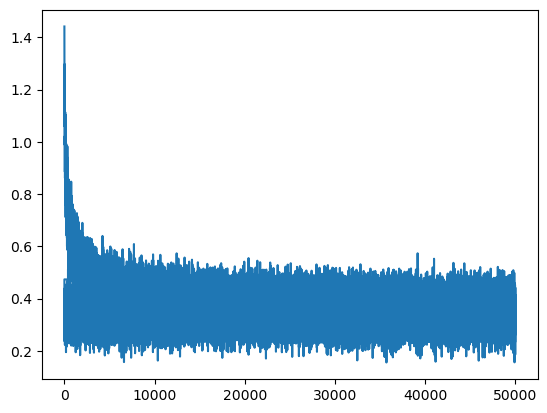

In [266]:
plt.plot(stepi,lossi)

In [270]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.1644, grad_fn=<NllLossBackward0>)

In [271]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1914, grad_fn=<NllLossBackward0>)

In [244]:
# Training Split , dev/validation split, test split
# 80 %, 10 %, 10%

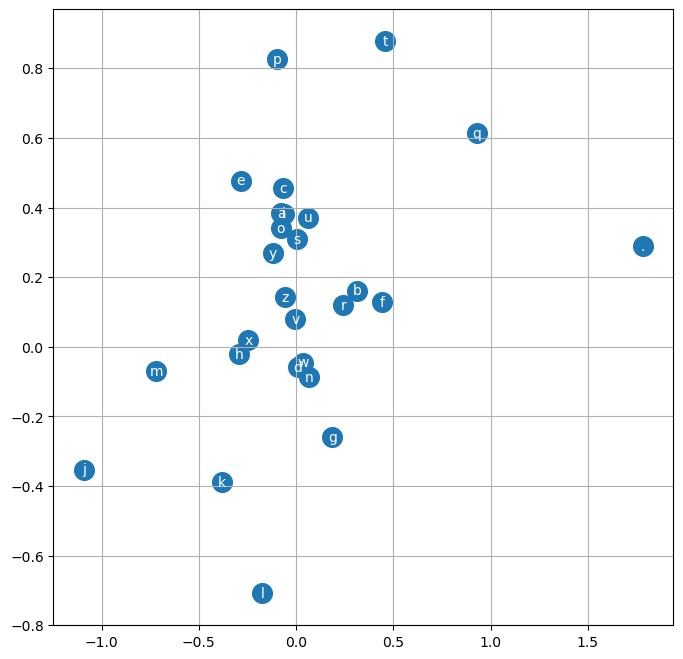

In [272]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')


In [273]:
#Sampling
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
kayah.
seel.
niha.
ala.
everstendra.
graderedgelin.
shi.
jen.
edelieananar.
kayzioh.
kalin.
shabergahimiel.
kinne.
jelipanterian.
brey.
dariyah.
fael.
yuma.
mys.
